In [520]:
#Import required libraries
import numpy as np,pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [521]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [522]:
#create dataframe from csv
df=pd.read_csv("loan.csv")


In [523]:
#check datatypes for all columns
pd.options.display.max_rows = 500
df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [524]:
df.shape

(39717, 111)

In [525]:
#No.of columns with all missing values
df.isnull().all(axis=0).sum()

54

In [526]:
#No.of rows with all missing values
df.isnull().all(axis=1).sum()

0

In [527]:
#Check the column names with missing values
df.isnull().sum(axis=0)

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [528]:
#delete columns with all empty values and checking the shape
df=df.dropna(axis=1, how='all')
df.shape

(39717, 57)

In [529]:
#checking duplicates
df.duplicated().sum()

0

In [530]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [531]:
#missing values in percentage
round(100*(df.isnull().sum()/len(df.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [532]:
#Colums with more and 60% missing values or more and non required columns
not_required_columns=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc','member_id','url','emp_title','zip_code','tax_liens']
#delete the columns
df.drop(not_required_columns,axis=1,inplace=True)

In [533]:
#more non-required columns
not_required_columns1=['earliest_cr_line','inq_last_6mths','title','pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt']
#delete the columns
df.drop(not_required_columns1,axis=1,inplace=True)

In [534]:
df.shape

(39717, 37)

In [535]:
#Cheking the value count of loan status
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [536]:
#Delete the records which has current as loan status 
#as current is for the existing customer who are still paying
df=df[df.loan_status!='Current']
df.shape

(38577, 37)

In [537]:
#checking null values in percentage
round(100*(df.isnull().sum()/len(df.index)),2)

id                         0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 2.68
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prncp                  0.00
out_prncp_inv              0.00
total_pymnt                0.00
total_pymnt_inv            0.00
total_rec_prncp            0.00
total_rec_int              0.00
total_rec_late_fee         0.00
recoveri

In [539]:
df.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [540]:
df.pub_rec_bankruptcies.value_counts()
#replace missing values with thois
#filling null values with most occuring value 
df.pub_rec_bankruptcies=df.pub_rec_bankruptcies.fillna(df.pub_rec_bankruptcies.mode()[0])

In [541]:
df.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [542]:
#df.emp_length.value_counts()
#remove  records  with NaN emp_length
df=df[~df.emp_length.isnull()]
df.isnull().sum()

id                          0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                 0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                 47
total_acc                   0
out_prncp                   0
out_prncp_inv               0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
total_rec_late_fee          0
recoveries                  0
collection_recovery_fee     0
last_pymnt

In [543]:
df.title.value_counts()#delete
#delete records with empty value
df=df[~df.title.isnull()]
df.isnull().sum()

AttributeError: 'DataFrame' object has no attribute 'title'

In [544]:
#df.revol_util.value_counts()#delete
#delete records with empty value
df=df[~df.revol_util.isnull()]
df.isnull().sum()

id                          0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                 0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
out_prncp                   0
out_prncp_inv               0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
total_rec_late_fee          0
recoveries                  0
collection_recovery_fee     0
last_pymnt

In [545]:
#df.last_pymnt_d.value_counts()#delete
#delete records with empty value
df=df[~df.last_pymnt_d.isnull()]


In [546]:
df.shape


(37435, 37)

In [547]:
#checking the value counts for term of loan
df.term.value_counts()

 36 months    28196
 60 months     9239
Name: term, dtype: int64

In [548]:
#extracting just the months and coberting to int
df['term']=df.term.str.extract('(\d+)').astype('int64')
df.head(2)

id  loan_amnt  funded_amnt  funded_amnt_inv  term int_rate  \
0  1077501       5000         5000           4975.0    36   10.65%   
1  1077430       2500         2500           2500.0    60   15.27%   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT     24000.0   
1        59.83     C        C4   < 1 year           RENT     30000.0   

  verification_status issue_d  loan_status      purpose addr_state    dti  \
0            Verified  Dec-11   Fully Paid  credit_card         AZ  27.65   
1     Source Verified  Dec-11  Charged Off          car         GA   1.00   

   delinq_2yrs  open_acc  pub_rec  revol_bal revol_util  total_acc  out_prncp  \
0            0         3        0      13648     83.70%          9        0.0   
1            0         3        0       1687      9.40%          4        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0  5863.155187          5833.84          5000.00   
1            0.0  1008.710000          1008.71           456.46   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                 0.0        0.00                     0.00   
1         435.17                 0.0      117.08                     1.11   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  
0       Jan-15           171.62             May-16                   0.0  
1       Apr-13           119.66             Sep-13                   0.0

In [549]:
#extracting just the rate and coberting to int
df['int_rate']=df.int_rate.str.rstrip('%').astype('float64')
df.head(2)

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000           4975.0    36     10.65   
1  1077430       2500         2500           2500.0    60     15.27   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT     24000.0   
1        59.83     C        C4   < 1 year           RENT     30000.0   

  verification_status issue_d  loan_status      purpose addr_state    dti  \
0            Verified  Dec-11   Fully Paid  credit_card         AZ  27.65   
1     Source Verified  Dec-11  Charged Off          car         GA   1.00   

   delinq_2yrs  open_acc  pub_rec  revol_bal revol_util  total_acc  out_prncp  \
0            0         3        0      13648     83.70%          9        0.0   
1            0         3        0       1687      9.40%          4        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0  5863.155187          5833.84          5000.00   
1            0.0  1008.710000          1008.71           456.46   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                 0.0        0.00                     0.00   
1         435.17                 0.0      117.08                     1.11   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  
0       Jan-15           171.62             May-16                   0.0  
1       Apr-13           119.66             Sep-13                   0.0

In [550]:
#extracting just the rate and coberting to float
df['emp_length']=df.emp_length.str.extract('(\d+)').astype('float64')
df.head(1)

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000           4975.0    36     10.65   

   installment grade sub_grade  emp_length home_ownership  annual_inc  \
0       162.87     B        B2        10.0           RENT     24000.0   

  verification_status issue_d loan_status      purpose addr_state    dti  \
0            Verified  Dec-11  Fully Paid  credit_card         AZ  27.65   

   delinq_2yrs  open_acc  pub_rec  revol_bal revol_util  total_acc  out_prncp  \
0            0         3        0      13648     83.70%          9        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0  5863.155187          5833.84           5000.0   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                 0.0         0.0                      0.0   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  
0       Jan-15           171.62             May-16                   0.0

In [551]:
#extracting just the rate and converting to int
df['revol_util']=df.revol_util.str.rstrip('%').astype('float64')
df.head(2)

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000           4975.0    36     10.65   
1  1077430       2500         2500           2500.0    60     15.27   

   installment grade sub_grade  emp_length home_ownership  annual_inc  \
0       162.87     B        B2        10.0           RENT     24000.0   
1        59.83     C        C4         1.0           RENT     30000.0   

  verification_status issue_d  loan_status      purpose addr_state    dti  \
0            Verified  Dec-11   Fully Paid  credit_card         AZ  27.65   
1     Source Verified  Dec-11  Charged Off          car         GA   1.00   

   delinq_2yrs  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0            0         3        0      13648        83.7          9   
1            0         3        0       1687         9.4          4   

   out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        0.0            0.0  5863.155187          5833.84          5000.00   
1        0.0            0.0  1008.710000          1008.71           456.46   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                 0.0        0.00                     0.00   
1         435.17                 0.0      117.08                     1.11   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  
0       Jan-15           171.62             May-16                   0.0  
1       Apr-13           119.66             Sep-13                   0.0

In [552]:
pd.options.display.max_columns = 500
df.head(1)

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000           4975.0    36     10.65   

   installment grade sub_grade  emp_length home_ownership  annual_inc  \
0       162.87     B        B2        10.0           RENT     24000.0   

  verification_status issue_d loan_status      purpose addr_state    dti  \
0            Verified  Dec-11  Fully Paid  credit_card         AZ  27.65   

   delinq_2yrs  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0            0         3        0      13648        83.7          9   

   out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        0.0            0.0  5863.155187          5833.84           5000.0   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                 0.0         0.0                      0.0   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  
0       Jan-15           171.62             May-16                   0.0

In [553]:
##Univariate analysis

Text(0.5, 0, 'Investor Funded Amount')

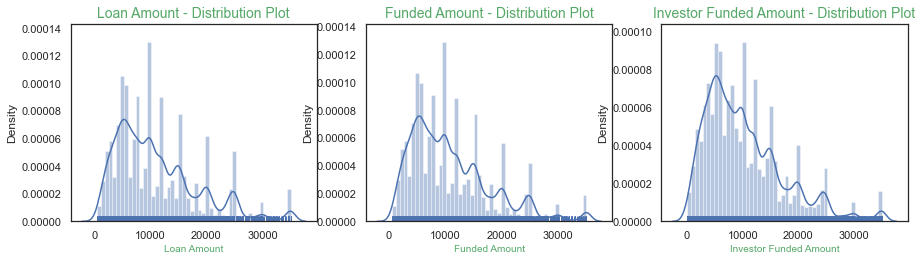

In [554]:
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("white")
#subplot 1
plt.subplot(2,3,1)
sub = sns.distplot(df['loan_amnt'],rug = True)
sub.set_title('Loan Amount - Distribution Plot',fontsize=14,color='g')
sub.set_xlabel('Loan Amount',fontsize=10,color='g')
#subplot 2
plt.subplot(2,3,2)
sub = sns.distplot(df['funded_amnt'],rug = True)
sub.set_title('Funded Amount - Distribution Plot',fontsize=14,color='g')
sub.set_xlabel('Funded Amount',fontsize=10,color='g')
#subplot 3
plt.subplot(2,3,3)
sub = sns.distplot(df['funded_amnt_inv'],rug = True)
sub.set_title('Investor Funded Amount - Distribution Plot',fontsize=14,color='g')
sub.set_xlabel('Investor Funded Amount',fontsize=10,color='g')

#below 3 amount looks same 
#Will be using loan amount for future referece

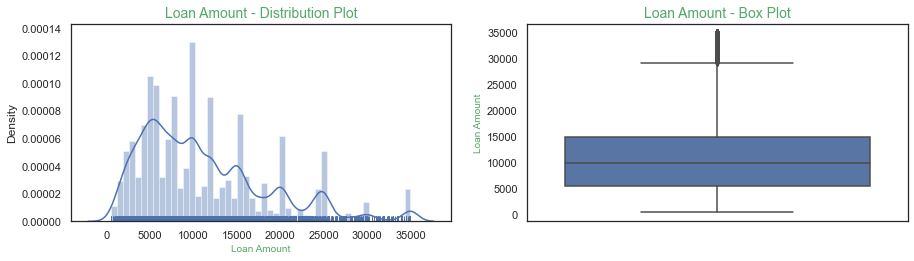

In [555]:
#Loan amount  plot
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("white")
#subplot 1
plt.subplot(2,2,1)
sub = sns.distplot(df['loan_amnt'],rug = True)
sub.set_title('Loan Amount - Distribution Plot',fontsize=14,color='g')
sub.set_xlabel('Loan Amount',fontsize=10,color='g')
#subplot 2
plt.subplot(2,2,2)
sub = sns.boxplot(y=df['loan_amnt'])
sub.set_title('Loan Amount - Box Plot',fontsize=14,color='g')
sub.set_ylabel('Loan Amount',fontsize=10,color='g')
plt.show()
#Most of the loan amount are in between 5000 and 150000

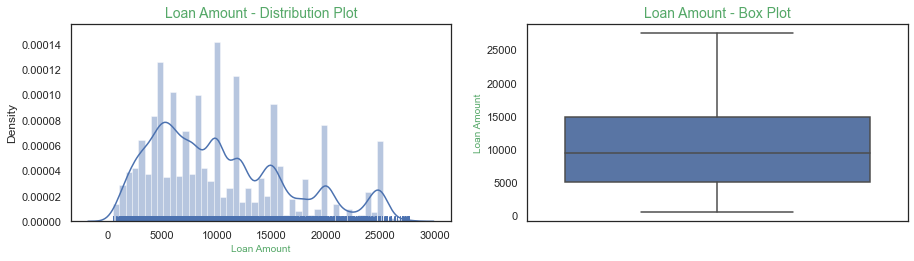

In [556]:
#Remove outliers for loan amount
df=df[df.loan_amnt<28000]
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("white")
#subplot 1
plt.subplot(2,2,1)
sub = sns.distplot(df['loan_amnt'],rug = True)
sub.set_title('Loan Amount - Distribution Plot',fontsize=14,color='g')
sub.set_xlabel('Loan Amount',fontsize=10,color='g')
#subplot 2
plt.subplot(2,2,2)
sub = sns.boxplot(y=df['loan_amnt'])
sub.set_title('Loan Amount - Box Plot',fontsize=14,color='g')
sub.set_ylabel('Loan Amount',fontsize=10,color='g')
plt.show()

In [557]:
df.shape

(36182, 37)

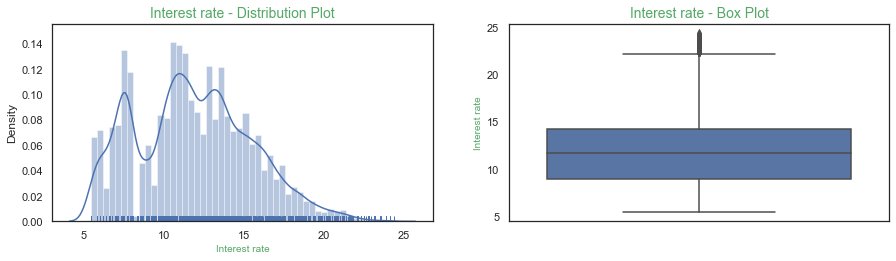

In [558]:
#Interst rate plot
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("white")
#subplot 1
plt.subplot(2,2,1)
sub = sns.distplot(df['int_rate'],rug = True)
sub.set_title('Interest rate - Distribution Plot',fontsize=14,color='g')
sub.set_xlabel('Interest rate',fontsize=10,color='g')
#subplot 2
plt.subplot(2,2,2)
sub = sns.boxplot(y=df['int_rate'])
sub.set_title('Interest rate - Box Plot',fontsize=14,color='g')
sub.set_ylabel('Interest rate',fontsize=10,color='g')
plt.show()

#Most of interst rate is between 7.5 and 15 %

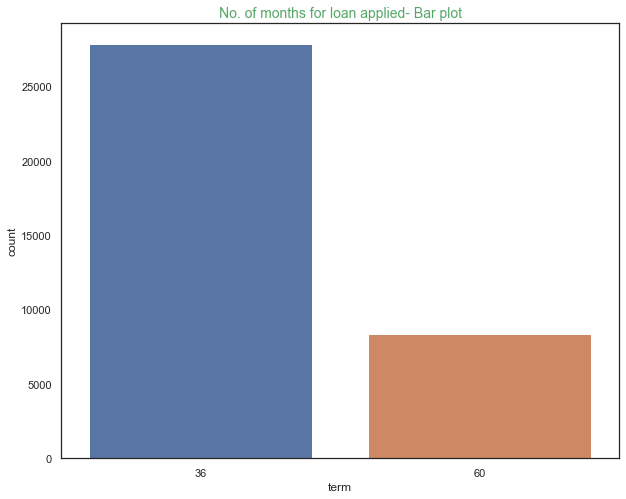

In [562]:
plt.figure(figsize=(10,8),facecolor='w')
sns.set_style("white")
sns.countplot(df.term)
plt.title("No. of months for loan applied- Bar plot",fontsize=14,color='g')
plt.show()

#Most of the customer choose 36 months term loan

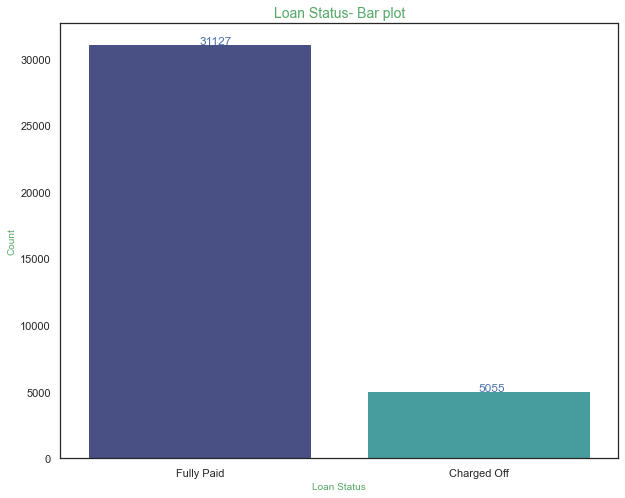

In [563]:
#Loan status plot
plt.figure(figsize=(10,8),facecolor='w')
sns.set_style("white")
ax=sns.countplot(x=df.loan_status,palette='mako')
ax.set_title("Loan Status- Bar plot",fontsize=14,color='g')
ax.set_xlabel("Loan Status",fontsize=10,color='g')
ax.set_ylabel("Count",fontsize=10,color='g')
#plt.show()
#df.loan_status.value_counts()

# To show count of values above bars

a=df['loan_status'].value_counts()
for i, v in a.reset_index().iterrows():
    ax.text(i, v.loan_status  , v.loan_status, color='b')

#Most of the loans are fully paid

In [564]:
df.shape

(36182, 37)

In [565]:
#creating new columns for year and month for better analysis
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df['year']=df['issue_d'].dt.year
df['month']=df['issue_d'].dt.month

df.head(1)

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000           4975.0    36     10.65   

   installment grade sub_grade  emp_length home_ownership  annual_inc  \
0       162.87     B        B2        10.0           RENT     24000.0   

  verification_status    issue_d loan_status      purpose addr_state    dti  \
0            Verified 2011-12-01  Fully Paid  credit_card         AZ  27.65   

   delinq_2yrs  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0            0         3        0      13648        83.7          9   

   out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        0.0            0.0  5863.155187          5833.84           5000.0   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                 0.0         0.0                      0.0   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  \
0       Jan-15           171.62             May-16                   0.0   

   year  month  
0  2011     12

In [566]:
df.reset_index(drop=True, inplace=True)

Text(0, 0.5, 'Loan Status')

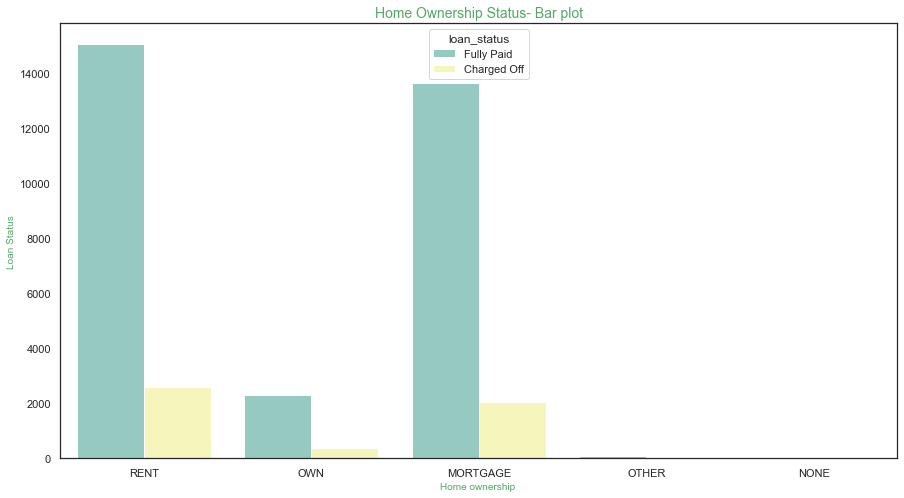

In [567]:
#Home owner ship vs loan status
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("white")
ax=sns.countplot(x=df.home_ownership,hue=df.loan_status,palette='Set3')
ax.set_title("Home Ownership Status- Bar plot",fontsize=14,color='g')
ax.set_xlabel("Home ownership ",fontsize=10,color='g')
ax.set_ylabel("Loan Status",fontsize=10,color='g')
#plt.show()
#df.loan_status.value_counts()

#Charged off customers - mostly rented customer and customer who have mortgaged their house


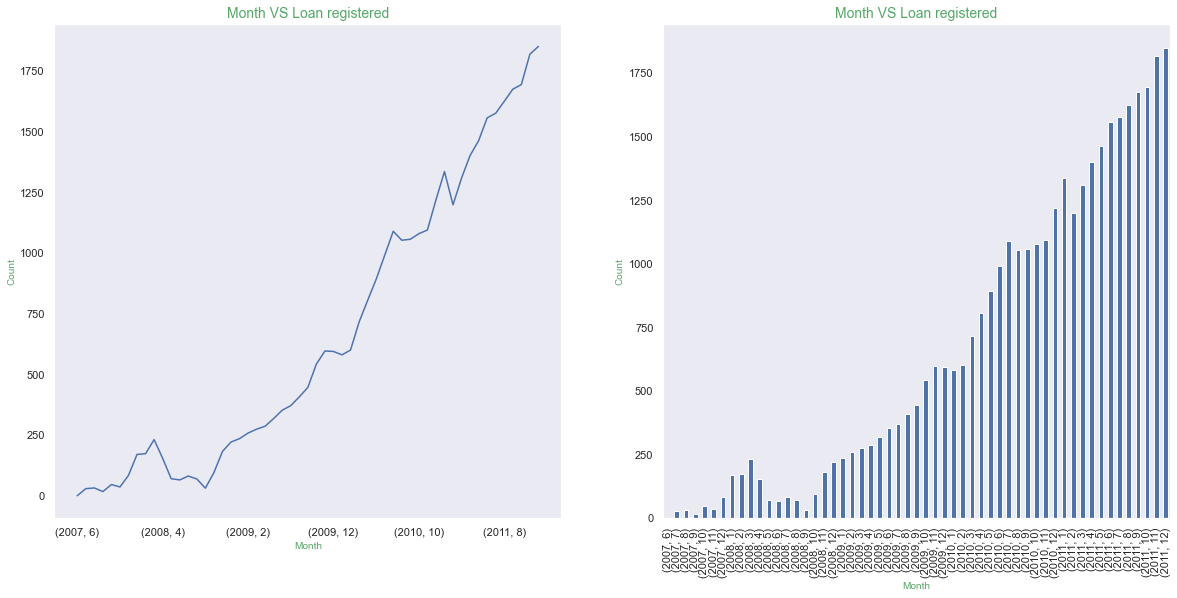

In [568]:
#Month VS Loan registered
plt.figure(figsize=(20,20),facecolor='w')
sns.set_style("dark")
#sunplot 1
plt.subplot(2,2,1)
ax=df.groupby(['year','month']).id.count().plot()
ax.set_title("Month VS Loan registered",fontsize=14,color='g')
ax.set_xlabel("Month",fontsize=10,color='g')
ax.set_ylabel("Count",fontsize=10,color='g')
#subplot 2
plt.subplot(2,2,2)
ax=df.groupby(['year','month']).id.count().plot.bar()
ax.set_title("Month VS Loan registered",fontsize=14,color='g')
ax.set_xlabel("Month",fontsize=10,color='g')
ax.set_ylabel("Count",fontsize=10,color='g')
plt.show()

#Increase in loan registration every year

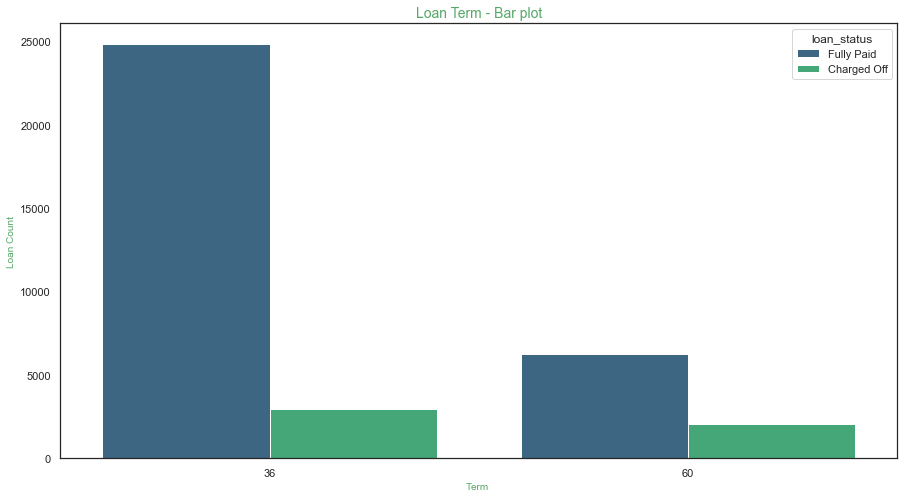

In [569]:
#Loan Term vs Loan status
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("white")
ax=sns.countplot(x=df.term,hue=df.loan_status,palette='viridis')
ax.set_title("Loan Term - Bar plot",fontsize=14,color='g')
ax.set_xlabel("Term ",fontsize=10,color='g')
ax.set_ylabel("Loan Count",fontsize=10,color='g')
plt.show()
#df.loan_status.value_counts()

#there is a slight difference in charged off customer for both the terms
#Will do further analysis with charged off percent and fully paid percent in later part

In [570]:
df.head(2)

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000           4975.0    36     10.65   
1  1077430       2500         2500           2500.0    60     15.27   

   installment grade sub_grade  emp_length home_ownership  annual_inc  \
0       162.87     B        B2        10.0           RENT     24000.0   
1        59.83     C        C4         1.0           RENT     30000.0   

  verification_status    issue_d  loan_status      purpose addr_state    dti  \
0            Verified 2011-12-01   Fully Paid  credit_card         AZ  27.65   
1     Source Verified 2011-12-01  Charged Off          car         GA   1.00   

   delinq_2yrs  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0            0         3        0      13648        83.7          9   
1            0         3        0       1687         9.4          4   

   out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        0.0            0.0  5863.155187          5833.84          5000.00   
1        0.0            0.0  1008.710000          1008.71           456.46   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                 0.0        0.00                     0.00   
1         435.17                 0.0      117.08                     1.11   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  \
0       Jan-15           171.62             May-16                   0.0   
1       Apr-13           119.66             Sep-13                   0.0   

   year  month  
0  2011     12  
1  2011     12

Text(0, 0.5, 'Loan Status')

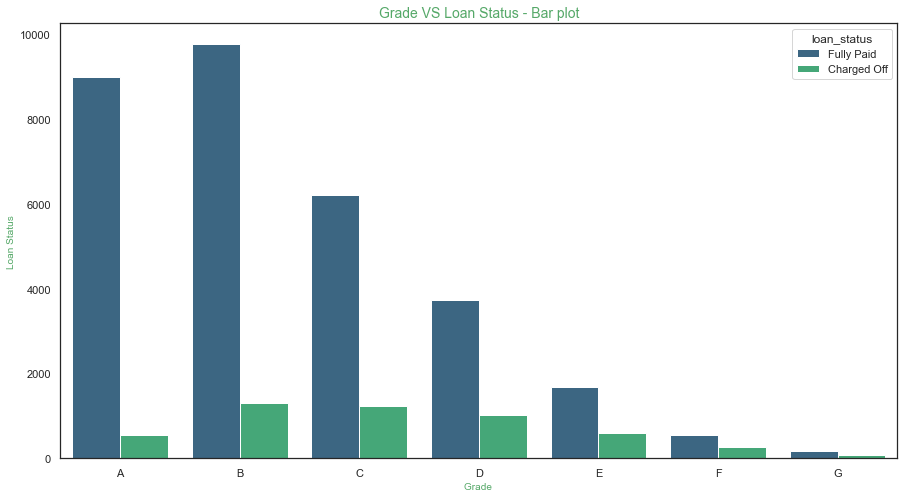

In [572]:
#Grade Vs loan status
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("white")
ax=sns.countplot(x=df.grade,hue=df.loan_status,palette='viridis',order="ABCDEFG")
ax.set_title("Grade VS Loan Status - Bar plot",fontsize=14,color='g')
ax.set_xlabel("Grade ",fontsize=10,color='g')
ax.set_ylabel("Loan Status",fontsize=10,color='g')
#plt.show()
#df.loan_status.value_counts()

#Not much difference in charged off customer
#futher analysis in done in terms of percentage in later part

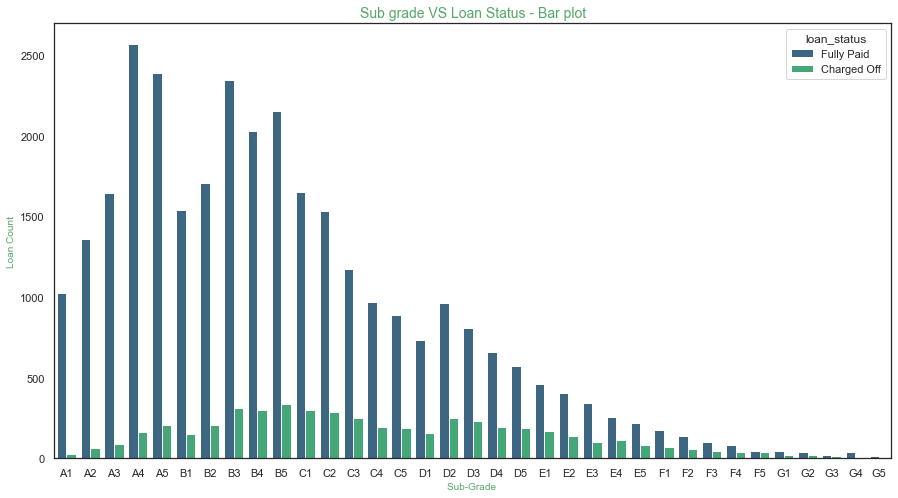

In [574]:
#sub grade Vs loan status
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("white")

ax=sns.countplot(x=df.sub_grade.sort_values(),hue=df.loan_status,palette='viridis')
ax.set_title("Sub grade VS Loan Status - Bar plot",fontsize=14,color='g')
ax.set_xlabel("Sub-Grade ",fontsize=10,color='g')
ax.set_ylabel("Loan Count",fontsize=10,color='g')
plt.show()


#very less customers for lower grades
#more customers and more charged off customers too higher grades
#charged off customers are more in D-E grades maybe due to less income
#Will do further analysis with charged off percent and fully paid percent in later part

In [575]:
##checking annual income 
px.box(df.annual_inc)

In [576]:


df.annual_inc.max()

6000000.0

In [577]:
#remove outlier <99 percentile
df.shape
df=df[df.annual_inc<df.annual_inc.quantile(.99)]


In [578]:
df.annual_inc.quantile(.99).max()

180000.0

In [579]:
px.box(df.annual_inc)

In [580]:
#remove  more outlier 
df.shape
df=df[df.annual_inc<140000]

In [581]:
df.shape

(34432, 39)

In [582]:
px.box(df.annual_inc)

In [583]:
#Bivariate analysis
#Use two or more featurs for analysis

In [584]:
#Creating Range_int_rate column for further analysis
df['Range_int_rate']=pd.cut(df.int_rate.astype('int64'),[0,5,10,15,20,25],labels=['0-5','05-10','10-15','15-20','20+'])
df.Range_int_rate=df.Range_int_rate.astype('string')
df.head(1)

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000           4975.0    36     10.65   

   installment grade sub_grade  emp_length home_ownership  annual_inc  \
0       162.87     B        B2        10.0           RENT     24000.0   

  verification_status    issue_d loan_status      purpose addr_state    dti  \
0            Verified 2011-12-01  Fully Paid  credit_card         AZ  27.65   

   delinq_2yrs  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0            0         3        0      13648        83.7          9   

   out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        0.0            0.0  5863.155187          5833.84           5000.0   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                 0.0         0.0                      0.0   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  \
0       Jan-15           171.62             May-16                   0.0   

   year  month Range_int_rate  
0  2011     12          05-10

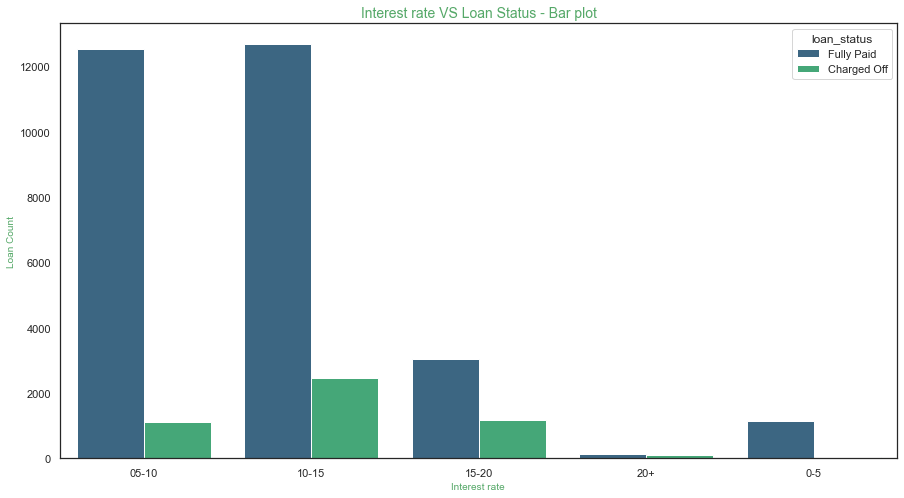

In [585]:
#Interest rate vs Loan status
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("white")
ax=sns.countplot(x=df.Range_int_rate,hue=df.loan_status,palette='viridis')
ax.set_title("Interest rate VS Loan Status - Bar plot",fontsize=14,color='g')
ax.set_xlabel("Interest rate ",fontsize=10,color='g')
ax.set_ylabel("Loan Count",fontsize=10,color='g')
plt.show()

#drill down further taking out the percentage of charged off and fully paid customers

In [586]:
#Range_int_rate_vs_loan_status
Range_int_rate_vs_loan_status = df.groupby(['Range_int_rate','loan_status']).loan_status.count().unstack().reset_index()
Range_int_rate_vs_loan_status['Total'] = Range_int_rate_vs_loan_status['Charged Off'] + Range_int_rate_vs_loan_status['Fully Paid'] 
Range_int_rate_vs_loan_status['Chargedoff_in_percent_%'] =( Range_int_rate_vs_loan_status['Charged Off'] / Range_int_rate_vs_loan_status['Total'])*100
Range_int_rate_vs_loan_status['Fully_paid_in_percent_%'] =( Range_int_rate_vs_loan_status['Fully Paid'] / Range_int_rate_vs_loan_status['Total'])*100

Range_int_rate_vs_loan_status.sort_values('Range_int_rate',ascending=True)

#Charged off customers are more for when the interest rates are high

loan_status Range_int_rate  Charged Off  Fully Paid  Total  \
0                      0-5           46        1141   1187   
1                    05-10         1099       12551  13650   
2                    10-15         2470       12691  15161   
3                    15-20         1161        3054   4215   
4                      20+           99         120    219   

loan_status  Chargedoff_in_percent_%  Fully_paid_in_percent_%  
0                           3.875316                96.124684  
1                           8.051282                91.948718  
2                          16.291801                83.708199  
3                          27.544484                72.455516  
4                          45.205479                54.794521

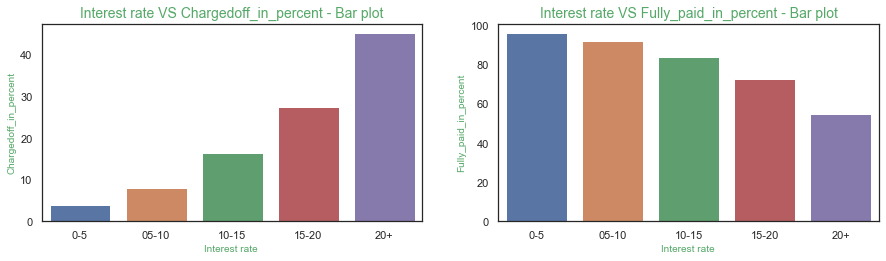

In [588]:
#Interest rate VS Charged off proportion
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("white")
#subplot 1
plt.subplot(2,2,1)
ax=sns.barplot(data=Range_int_rate_vs_loan_status,x='Range_int_rate',y='Chargedoff_in_percent_%')
ax.set_title("Interest rate VS Chargedoff_in_percent - Bar plot",fontsize=14,color='g')
ax.set_xlabel("Interest rate ",fontsize=10,color='g')
ax.set_ylabel("Chargedoff_in_percent",fontsize=10,color='g')
#subplot 1
plt.subplot(2,2,2)
ax=sns.barplot(data=Range_int_rate_vs_loan_status,x='Range_int_rate',y='Fully_paid_in_percent_%')
ax.set_title("Interest rate VS Fully_paid_in_percent - Bar plot",fontsize=14,color='g')
ax.set_xlabel("Interest rate ",fontsize=10,color='g')
ax.set_ylabel("Fully_paid_in_percent",fontsize=10,color='g')
plt.show()

#As observed charged off customers are more as the interest rate increases 

In [589]:
#lets try for different bins
#creating bins for annual income
df['Range_annual_inc']=pd.cut(df.annual_inc.astype('int64'),[0,30000,60000,90000,120000,150000],labels=['0k-30k','30k-60k','60k-90k','90k-120k','120k+'])
df.Range_annual_inc=df.Range_annual_inc.astype('string')
df.head(1)

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000           4975.0    36     10.65   

   installment grade sub_grade  emp_length home_ownership  annual_inc  \
0       162.87     B        B2        10.0           RENT     24000.0   

  verification_status    issue_d loan_status      purpose addr_state    dti  \
0            Verified 2011-12-01  Fully Paid  credit_card         AZ  27.65   

   delinq_2yrs  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0            0         3        0      13648        83.7          9   

   out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        0.0            0.0  5863.155187          5833.84           5000.0   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                 0.0         0.0                      0.0   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  \
0       Jan-15           171.62             May-16                   0.0   

   year  month Range_int_rate Range_annual_inc  
0  2011     12          05-10           0k-30k

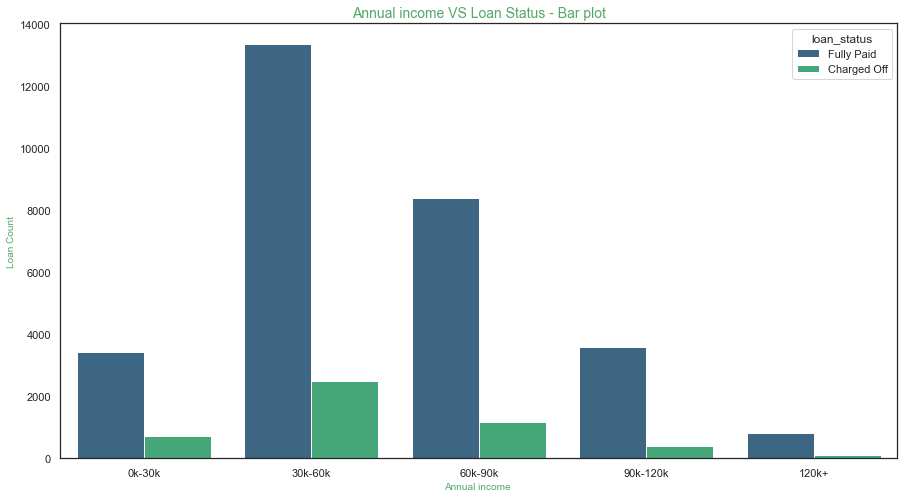

In [590]:
#Annual Income vs loan status
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("white")
ax=sns.countplot(x=df.Range_annual_inc,hue=df.loan_status,palette='viridis')
ax.set_title("Annual income VS Loan Status - Bar plot",fontsize=14,color='g')
ax.set_xlabel("Annual income ",fontsize=10,color='g')
ax.set_ylabel("Loan Count",fontsize=10,color='g')
plt.show()

#very few people above >120k salary eange
#charge off customer are seen more in mid level annual income


In [591]:
#Cross checking the cross off percent
Range_annual_inc_vs_loan_status = df.groupby(['Range_annual_inc','loan_status']).loan_status.count().unstack().reset_index()
Range_annual_inc_vs_loan_status['Total'] = Range_annual_inc_vs_loan_status['Charged Off']+ Range_annual_inc_vs_loan_status['Fully Paid'] 
Range_annual_inc_vs_loan_status['Chargedoff_in_percent_%'] =( Range_annual_inc_vs_loan_status['Charged Off'] / Range_annual_inc_vs_loan_status['Total'])*100
Range_annual_inc_vs_loan_status['Fully_paid_in_percent_%'] =( Range_annual_inc_vs_loan_status['Fully Paid'] / Range_annual_inc_vs_loan_status['Total'])*100
Range_annual_inc_vs_loan_status.sort_values('Chargedoff_in_percent_%', ascending=False)

#Charged off customers are more for lower income range

loan_status Range_annual_inc  Charged Off  Fully Paid  Total  \
0                     0k-30k          728        3417   4145   
2                    30k-60k         2478       13355  15833   
3                    60k-90k         1177        8385   9562   
1                      120k+          101         823    924   
4                   90k-120k          391        3577   3968   

loan_status  Chargedoff_in_percent_%  Fully_paid_in_percent_%  
0                          17.563329                82.436671  
2                          15.650856                84.349144  
3                          12.309140                87.690860  
1                          10.930736                89.069264  
4                           9.853831                90.146169

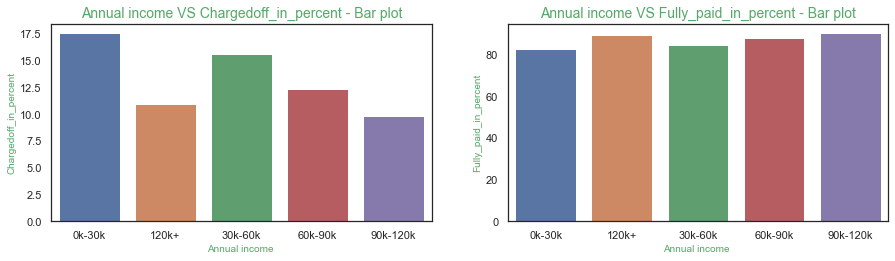

In [592]:
#Annual income VS Charged off proportion
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("white")
#subplot 1
plt.subplot(2,2,1)
ax=sns.barplot(data=Range_annual_inc_vs_loan_status,x='Range_annual_inc',y='Chargedoff_in_percent_%')
ax.set_title("Annual income VS Chargedoff_in_percent - Bar plot",fontsize=14,color='g')
ax.set_xlabel("Annual income ",fontsize=10,color='g')
ax.set_ylabel("Chargedoff_in_percent",fontsize=10,color='g')
#subplot 2
plt.subplot(2,2,2)
ax=sns.barplot(data=Range_annual_inc_vs_loan_status,x='Range_annual_inc',y='Fully_paid_in_percent_%')
ax.set_title("Annual income VS Fully_paid_in_percent - Bar plot",fontsize=14,color='g')
ax.set_xlabel("Annual income ",fontsize=10,color='g')
ax.set_ylabel("Fully_paid_in_percent",fontsize=10,color='g')
plt.show()

In [593]:
df.loan_amnt.describe()

count    34432.000000
mean     10155.111524
std       6150.870598
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
max      27600.000000
Name: loan_amnt, dtype: float64

In [594]:
#lets try for different bins
#creating bins for annual income
df['Range_loan_amnt']=pd.cut(df.loan_amnt.astype('int64'),[0,5000,10000,15000,200000,250000],labels=['0-5000','5000-10000','10000-15000','15000-20000','20000+'])
df.Range_annual_inc=df.Range_annual_inc.astype('string')
df.head(1)

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000           4975.0    36     10.65   

   installment grade sub_grade  emp_length home_ownership  annual_inc  \
0       162.87     B        B2        10.0           RENT     24000.0   

  verification_status    issue_d loan_status      purpose addr_state    dti  \
0            Verified 2011-12-01  Fully Paid  credit_card         AZ  27.65   

   delinq_2yrs  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0            0         3        0      13648        83.7          9   

   out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        0.0            0.0  5863.155187          5833.84           5000.0   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                 0.0         0.0                      0.0   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  \
0       Jan-15           171.62             May-16                   0.0   

   year  month Range_int_rate Range_annual_inc Range_loan_amnt  
0  2011     12          05-10           0k-30k          0-5000

In [598]:
#Range_loab amount vs loan_status
Range_loan_amnt_vs_loan_status = df.groupby(['Range_loan_amnt','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
Range_loan_amnt_vs_loan_status['Total'] = Range_loan_amnt_vs_loan_status['Charged Off'] + Range_loan_amnt_vs_loan_status['Fully Paid'] 
Range_loan_amnt_vs_loan_status['Chargedoff_in_percent_%'] =( Range_loan_amnt_vs_loan_status['Charged Off'] / Range_loan_amnt_vs_loan_status['Total'])*100
Range_loan_amnt_vs_loan_status['Fully_paid_in_percent_%'] =( Range_loan_amnt_vs_loan_status['Fully Paid'] / Range_loan_amnt_vs_loan_status['Total'])*100

Range_loan_amnt_vs_loan_status.sort_values('Range_loan_amnt',ascending=True)

loan_status Range_loan_amnt  Charged Off  Fully Paid  Total  \
0                    0-5000         1169        7663   8832   
1                5000-10000         1512       10500  12012   
2               10000-15000          983        6171   7154   
3               15000-20000         1211        5223   6434   
4                    20000+            0           0      0   

loan_status  Chargedoff_in_percent_%  Fully_paid_in_percent_%  
0                          13.235960                86.764040  
1                          12.587413                87.412587  
2                          13.740565                86.259435  
3                          18.821884                81.178116  
4                                NaN                      NaN

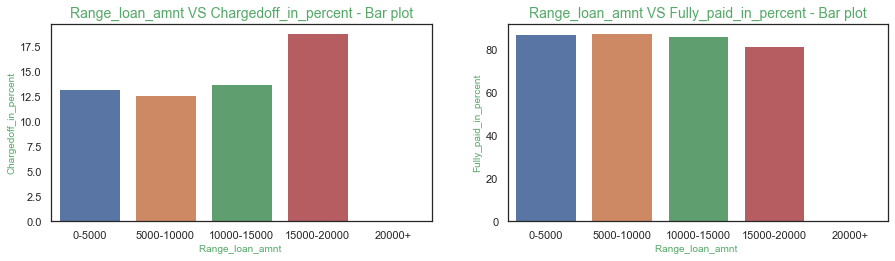

In [599]:
#Loan amount VS Charged off  and Fully paid percentage
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("white")
#subplot 1
plt.subplot(2,2,1)
ax=sns.barplot(data=Range_loan_amnt_vs_loan_status,x='Range_loan_amnt',y='Chargedoff_in_percent_%')
ax.set_title("Range_loan_amnt VS Chargedoff_in_percent - Bar plot",fontsize=14,color='g')
ax.set_xlabel("Range_loan_amnt ",fontsize=10,color='g')
ax.set_ylabel("Chargedoff_in_percent",fontsize=10,color='g')
#subplot 2
plt.subplot(2,2,2)
ax=sns.barplot(data=Range_loan_amnt_vs_loan_status,x='Range_loan_amnt',y='Fully_paid_in_percent_%')
ax.set_title("Range_loan_amnt VS Fully_paid_in_percent - Bar plot",fontsize=14,color='g')
ax.set_xlabel("Range_loan_amnt ",fontsize=10,color='g')
ax.set_ylabel("Fully_paid_in_percent",fontsize=10,color='g')
plt.show()

#Charged off customer are more for income range 15000-20000 range loan amount

In [601]:
#Grade vs loan status
Grade_vs_loan_status = df.groupby(['grade','sub_grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
Grade_vs_loan_status['Total'] = Grade_vs_loan_status['Charged Off'] + Grade_vs_loan_status['Fully Paid'] 
Grade_vs_loan_status['Chargedoff_in_percent_%'] =( Grade_vs_loan_status['Charged Off'] / Grade_vs_loan_status['Total'])*100
Grade_vs_loan_status['Fully_paid_in_percent_%'] =( Grade_vs_loan_status['Fully Paid'] / Grade_vs_loan_status['Total'])*100
Grade_vs_loan_status['grade_sub_grade']=Grade_vs_loan_status['grade'].astype('string')+"-"+Grade_vs_loan_status['sub_grade'].astype('string')
Grade_vs_loan_status.sort_values('Chargedoff_in_percent_%',ascending=True)

loan_status grade sub_grade  Charged Off  Fully Paid  Total  \
0               A        A1           24         983   1007   
1               A        A2           66        1302   1368   
2               A        A3           88        1584   1672   
3               A        A4          162        2455   2617   
4               A        A5          199        2279   2478   
5               B        B1          147        1464   1611   
6               B        B2          197        1625   1822   
7               B        B3          297        2203   2500   
8               B        B4          293        1934   2227   
9               B        B5          328        2045   2373   
10              C        C1          295        1577   1872   
11              C        C2          283        1462   1745   
13              C        C4          194         920   1114   
15              D        D1          150         700    850   
12              C        C3          245        1109   1354   
14              C        C5          187         844   1031   
16              D        D2          243         911   1154   
17              D        D3          222         775    997   
33              G        G4            9          31     40   
22              E        E3           97         319    416   
18              D        D4          190         622    812   
19              D        D5          184         541    725   
21              E        E2          129         377    506   
20              E        E1          159         436    595   
25              F        F1           65         168    233   
24              E        E5           78         194    272   
26              F        F2           53         131    184   
27              F        F3           40          95    135   
23              E        E4          103         241    344   
30              G        G1           20          45     65   
28              F        F4           40          80    120   
31              G        G2           22          34     56   
34              G        G5            9          12     21   
32              G        G3           16          19     35   
29              F        F5           41          40     81   

loan_status  Chargedoff_in_percent_%  Fully_paid_in_percent_% grade_sub_grade  
0                           2.383317                97.616683            A-A1  
1                           4.824561                95.175439            A-A2  
2                           5.263158                94.736842            A-A3  
3                           6.190294                93.809706            A-A4  
4                           8.030670                91.969330            A-A5  
5                           9.124767                90.875233            B-B1  
6                          10.812294                89.187706            B-B2  
7                          11.880000                88.120000            B-B3  
8                          13.156713                86.843287            B-B4  
9                          13.822166                86.177834            B-B5  
10                         15.758547                84.241453            C-C1  
11                         16.217765                83.782235            C-C2  
13                         17.414722                82.585278            C-C4  
15                         17.647059                82.352941            D-D1  
12                         18.094535                81.905465            C-C3  
14                         18.137730                81.862270            C-C5  
16                         21.057192                78.942808            D-D2  
17                         22.266800                77.733200            D-D3  
33                         22.500000                77.500000            G-G4  
22                         23.317308                76.682692            E-E3  
18                         23.399015               

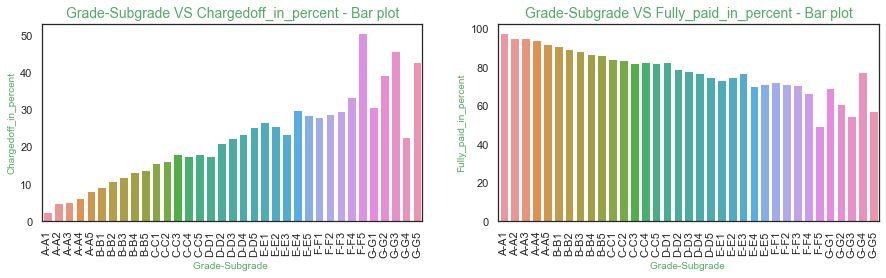

In [602]:
#Grade-Subgrade VS Chargedoff_in_percent - Bar plot

plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("white")
#subplot1
plt.subplot(2,2,1)
ax=sns.barplot(data=Grade_vs_loan_status,x='grade_sub_grade',y='Chargedoff_in_percent_%')
ax.set_title("Grade-Subgrade VS Chargedoff_in_percent - Bar plot",fontsize=14,color='g')
ax.set_xlabel("Grade-Subgrade ",fontsize=10,color='g')
ax.set_ylabel("Chargedoff_in_percent",fontsize=10,color='g')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

#Grade-Subgrade VS Fully_paid_in_percent - Bar plot
plt.subplot(2,2,2)
ax=sns.barplot(data=Grade_vs_loan_status,x='grade_sub_grade',y='Fully_paid_in_percent_%')
ax.set_title("Grade-Subgrade VS Fully_paid_in_percent - Bar plot",fontsize=14,color='g')
ax.set_xlabel("Grade-Subgrade ",fontsize=10,color='g')
ax.set_ylabel("Fully_paid_in_percent",fontsize=10,color='g')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()
# Fully paid customer percent are more for higher grades.
#Charged of customer percentage increases as the grades mooves from A to G

In [603]:
df.head(1)

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000           4975.0    36     10.65   

   installment grade sub_grade  emp_length home_ownership  annual_inc  \
0       162.87     B        B2        10.0           RENT     24000.0   

  verification_status    issue_d loan_status      purpose addr_state    dti  \
0            Verified 2011-12-01  Fully Paid  credit_card         AZ  27.65   

   delinq_2yrs  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0            0         3        0      13648        83.7          9   

   out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        0.0            0.0  5863.155187          5833.84           5000.0   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                 0.0         0.0                      0.0   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  \
0       Jan-15           171.62             May-16                   0.0   

   year  month Range_int_rate Range_annual_inc Range_loan_amnt  
0  2011     12          05-10           0k-30k          0-5000

In [604]:
#Employment lenght in years VS loan status
emp_length_vs_loan_status = df.groupby(['emp_length','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emp_length_vs_loan_status['Total'] = emp_length_vs_loan_status['Charged Off'] + emp_length_vs_loan_status['Fully Paid'] 
emp_length_vs_loan_status['Chargedoff_in_percent_%'] =( emp_length_vs_loan_status['Charged Off'] / emp_length_vs_loan_status['Total'])*100
emp_length_vs_loan_status['Fully_paid_in_percent_%'] =( emp_length_vs_loan_status['Fully Paid'] / emp_length_vs_loan_status['Total'])*100
emp_length_vs_loan_status.sort_values('Chargedoff_in_percent_%',ascending=False)

#charged off percentage is more for 10 and 7 years employment length

loan_status  emp_length  Charged Off  Fully Paid  Total  \
9                  10.0         1157        6282   7439   
6                   7.0          238        1351   1589   
0                   1.0         1015        6189   7204   
7                   8.0          181        1104   1285   
4                   5.0          414        2529   2943   
5                   6.0          280        1729   2009   
2                   3.0          506        3219   3725   
3                   4.0          416        2683   3099   
1                   2.0          524        3490   4014   
8                   9.0          144         981   1125   

loan_status  Chargedoff_in_percent_%  Fully_paid_in_percent_%  
9                          15.553166                84.446834  
6                          14.977974                85.022026  
0                          14.089395                85.910605  
7                          14.085603                85.914397  
4                          14.067278                85.932722  
5                          13.937282                86.062718  
2                          13.583893                86.416107  
3                          13.423685                86.576315  
1                          13.054310                86.945690  
8                          12.800000                87.200000

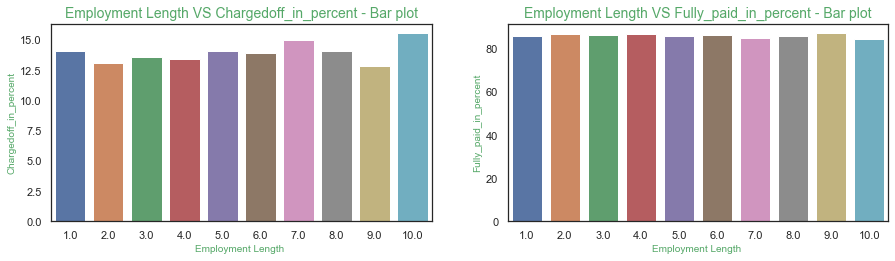

In [606]:
#Employment lenght in years VS loan status-Plot
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("white")
#subplot 1
plt.subplot(2,2,1)
ax=sns.barplot(data=emp_length_vs_loan_status,x='emp_length',y='Chargedoff_in_percent_%')
ax.set_title("Employment Length VS Chargedoff_in_percent - Bar plot",fontsize=14,color='g')
ax.set_xlabel("Employment Length ",fontsize=10,color='g')
ax.set_ylabel("Chargedoff_in_percent",fontsize=10,color='g')
#subplot 2
plt.subplot(2,2,2)
ax=sns.barplot(data=emp_length_vs_loan_status,x='emp_length',y='Fully_paid_in_percent_%')
ax.set_title("Employment Length VS Fully_paid_in_percent - Bar plot",fontsize=14,color='g')
ax.set_xlabel("Employment Length ",fontsize=10,color='g')
ax.set_ylabel("Fully_paid_in_percent",fontsize=10,color='g')
plt.show()

#Not much difference is observed for difference age group
#Slightly more charged off percentage  for more than 10 years experienced 

In [607]:
#Purpose of loan VS loan status
purpose_vs_loan_status = df.groupby(['purpose','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan_status['Total'] = purpose_vs_loan_status['Charged Off'] + purpose_vs_loan_status['Fully Paid'] 
purpose_vs_loan_status['Chargedoff_in_percent_%'] =( purpose_vs_loan_status['Charged Off'] / purpose_vs_loan_status['Total'])*100
purpose_vs_loan_status['Fully_paid_in_percent_%'] =( purpose_vs_loan_status['Fully Paid'] / purpose_vs_loan_status['Total'])*100
purpose_vs_loan_status.sort_values('Chargedoff_in_percent_%',ascending=False)

#Charged off percent is more  for small business and renewable energy
#Now plotting the same below


loan_status             purpose  Charged Off  Fully Paid  Total  \
11               small_business          393        1085   1478   
10             renewable_energy           16          68     84   
3                   educational           49         251    300   
8                        moving           82         437    519   
9                         other          546        2931   3477   
5                         house           48         259    307   
7                       medical           95         514    609   
2            debt_consolidation         2414       13843  16257   
12                     vacation           49         286    335   
4              home_improvement          286        2071   2357   
0                           car          153        1237   1390   
1                   credit_card          466        4058   4524   
6                major_purchase          197        1738   1935   
13                      wedding           81         779    860   

loan_status  Chargedoff_in_percent_%  Fully_paid_in_percent_%  
11                         26.589986                73.410014  
10                         19.047619                80.952381  
3                          16.333333                83.666667  
8                          15.799615                84.200385  
9                          15.703192                84.296808  
5                          15.635179                84.364821  
7                          15.599343                84.400657  
2                          14.848988                85.151012  
12                         14.626866                85.373134  
4                          12.134069                87.865931  
0                          11.007194                88.992806  
1                          10.300619                89.699381  
6                          10.180879                89.819121  
13                          9.418605                90.581395

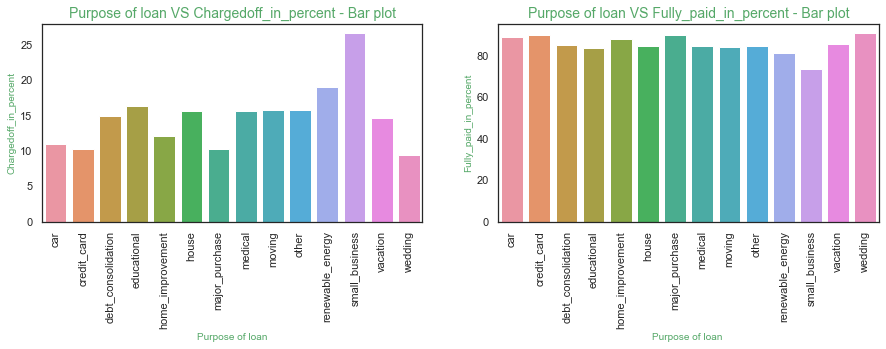

In [608]:
#Plot- Purpose of loan vs loan status
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("white")
#subplot 1
plt.subplot(2,2,1)
ax=sns.barplot(data=purpose_vs_loan_status,x='purpose',y='Chargedoff_in_percent_%')
ax.set_title("Purpose of loan VS Chargedoff_in_percent - Bar plot",fontsize=14,color='g')
ax.set_xlabel("Purpose of loan",fontsize=10,color='g')
ax.set_ylabel("Chargedoff_in_percent",fontsize=10,color='g')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
#subplot 2
plt.subplot(2,2,2)
ax=sns.barplot(data=purpose_vs_loan_status,x='purpose',y='Fully_paid_in_percent_%')
ax.set_title("Purpose of loan VS Fully_paid_in_percent - Bar plot",fontsize=14,color='g')
ax.set_xlabel("Purpose of loan ",fontsize=10,color='g')
ax.set_ylabel("Fully_paid_in_percent",fontsize=10,color='g')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

#Charged off percent is more  for small business and renewable energy

In [609]:
df.dti.describe()

count    34432.000000
mean        13.450405
std          6.649682
min          0.000000
25%          8.360000
50%         13.570000
75%         18.700000
max         29.990000
Name: dti, dtype: float64

In [610]:
#binning dti
df['Range_dti']=pd.cut(df.dti.astype('int64'),[0,5,10,15,20,25],labels=['0-5','5-10','10-15','15-20','20+'])
df.Range_annual_inc=df.Range_annual_inc.astype('string')
df.head(1)

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000           4975.0    36     10.65   

   installment grade sub_grade  emp_length home_ownership  annual_inc  \
0       162.87     B        B2        10.0           RENT     24000.0   

  verification_status    issue_d loan_status      purpose addr_state    dti  \
0            Verified 2011-12-01  Fully Paid  credit_card         AZ  27.65   

   delinq_2yrs  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0            0         3        0      13648        83.7          9   

   out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        0.0            0.0  5863.155187          5833.84           5000.0   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                 0.0         0.0                      0.0   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  \
0       Jan-15           171.62             May-16                   0.0   

   year  month Range_int_rate Range_annual_inc Range_loan_amnt Range_dti  
0  2011     12          05-10           0k-30k          0-5000       NaN

In [611]:
#DTI VS loan status

dti_vs_loan_status = df.groupby(['Range_dti','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan_status['Total'] = dti_vs_loan_status['Charged Off'] + dti_vs_loan_status['Fully Paid'] 
dti_vs_loan_status['Chargedoff_in_percent_%'] =( dti_vs_loan_status['Charged Off'] / dti_vs_loan_status['Total'])*100
dti_vs_loan_status['Fully_paid_in_percent_%'] =( dti_vs_loan_status['Fully Paid'] / dti_vs_loan_status['Total'])*100
dti_vs_loan_status.sort_values('Chargedoff_in_percent_%',ascending=False)

#Greater the dti , greater the charged off percentage
#ploting the same now

loan_status Range_dti  Charged Off  Fully Paid  Total  \
4                 20+          784        4031   4815   
3               15-20         1218        6499   7717   
2               10-15         1237        7472   8709   
1                5-10          931        6378   7309   
0                 0-5          562        4112   4674   

loan_status  Chargedoff_in_percent_%  Fully_paid_in_percent_%  
4                          16.282451                83.717549  
3                          15.783335                84.216665  
2                          14.203697                85.796303  
1                          12.737721                87.262279  
0                          12.023962                87.976038

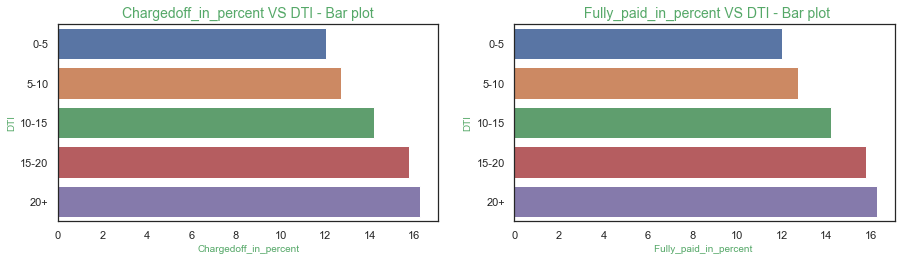

In [612]:
#Plot- Ranged DTI vs loan status
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("white")
#subplot 1
plt.subplot(2,2,1)
ax=sns.barplot(data=dti_vs_loan_status,x='Chargedoff_in_percent_%',y='Range_dti')
ax.set_title("Chargedoff_in_percent VS DTI - Bar plot",fontsize=14,color='g')
ax.set_xlabel("Chargedoff_in_percent",fontsize=10,color='g')
ax.set_ylabel("DTI",fontsize=10,color='g')
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
#subplot 2
plt.subplot(2,2,2)
ax=sns.barplot(data=dti_vs_loan_status,x='Chargedoff_in_percent_%',y='Range_dti')
ax.set_title(" Fully_paid_in_percent VS DTI - Bar plot",fontsize=14,color='g')
ax.set_xlabel("Fully_paid_in_percent ",fontsize=10,color='g')
ax.set_ylabel("DTI",fontsize=10,color='g')
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

#observed the same,with increase in DTI the charged off percent increases.

In [613]:
df.verification_status.value_counts()

Not Verified       15766
Verified            9880
Source Verified     8786
Name: verification_status, dtype: int64

In [614]:
#Verification Status VS loan status

verification_status_vs_loan_status = df.groupby(['verification_status','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verification_status_vs_loan_status['Total'] = verification_status_vs_loan_status['Charged Off'] + verification_status_vs_loan_status['Fully Paid'] 
verification_status_vs_loan_status['Chargedoff_in_percent_%'] =( verification_status_vs_loan_status['Charged Off'] / verification_status_vs_loan_status['Total'])*100
verification_status_vs_loan_status['Fully_paid_in_percent_%'] =( verification_status_vs_loan_status['Fully Paid'] / verification_status_vs_loan_status['Total'])*100
verification_status_vs_loan_status.sort_values('Chargedoff_in_percent_%',ascending=False)

#Verified LC has more charged off percent than other

loan_status verification_status  Charged Off  Fully Paid  Total  \
2                      Verified         1628        8252   9880   
1               Source Verified         1287        7499   8786   
0                  Not Verified         1960       13806  15766   

loan_status  Chargedoff_in_percent_%  Fully_paid_in_percent_%  
2                          16.477733                83.522267  
1                          14.648304                85.351696  
0                          12.431815                87.568185

In [615]:
#df.addr_state.value_counts()

In [616]:
#adress state vs loan status
addr_state_vs_loan_status = df.groupby(['addr_state','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan_status['Total'] = addr_state_vs_loan_status['Charged Off'] + addr_state_vs_loan_status['Fully Paid'] 
addr_state_vs_loan_status['Chargedoff_in_percent_%'] =( addr_state_vs_loan_status['Charged Off'] / addr_state_vs_loan_status['Total'])*100
addr_state_vs_loan_status['Fully_paid_in_percent_%'] =( addr_state_vs_loan_status['Fully Paid'] / addr_state_vs_loan_status['Total'])*100
addr_state_vs_loan_status.sort_values('Chargedoff_in_percent_%',ascending=False)

#NE state has the largest charged off percentage

loan_status addr_state  Charged Off  Fully Paid   Total  \
28                  NE          3.0         2.0     5.0   
32                  NV         90.0       338.0   428.0   
13                  ID          1.0         4.0     5.0   
0                   AK         13.0        53.0    66.0   
40                  SD         11.0        48.0    59.0   
11                  HI         27.0       123.0   150.0   
9                   FL        439.0      2053.0  2492.0   
31                  NM         28.0       140.0   168.0   
24                  MO         98.0       509.0   607.0   
30                  NJ        252.0      1332.0  1584.0   
27                  NC        104.0       556.0   660.0   
10                  GA        188.0      1012.0  1200.0   
4                   CA        962.0      5196.0  6158.0   
36                  OR         63.0       343.0   406.0   
46                  WA        113.0       620.0   733.0   
20                  MD        140.0       776.0   916.0   
43                  UT         34.0       195.0   229.0   
35                  OK         40.0       231.0   271.0   
39                  SC         61.0       360.0   421.0   
29                  NH         20.0       120.0   140.0   
3                   AZ        105.0       635.0   740.0   
22                  MI         87.0       536.0   623.0   
17                  KY         40.0       249.0   289.0   
47                  WI         54.0       340.0   394.0   
23                  MN         74.0       471.0   545.0   
14                  IL        179.0      1147.0  1326.0   
38                  RI         24.0       159.0   183.0   
33                  NY        425.0      2843.0  3268.0   
6                   CT         81.0       545.0   626.0   
18                  LA         48.0       333.0   381.0   
48                  WV         19.0       133.0   152.0   
41                  TN          2.0        14.0    16.0   
44                  VA        153.0      1086.0  1239.0   
5                   CO         84.0       610.0   694.0   
34                  OH        130.0       945.0  1075.0   
19                  MA        138.0      1018.0  1156.0   
2                   AR         25.0       189.0   214.0   
45                  VT          6.0        46.0    52.0   
37                  PA        154.0      1197.0  1351.0   
42                  TX        260.0      2066.0  2326.0   
1                   AL         43.0       345.0   388.0   
26                  MT          8.0        65.0    73.0   
8                   DE         11.0        93.0   104.0   
25                  MS          2.0        17.0    19.0   
16                  KS         23.0       202.0   225.0   
7                   DC         11.0       173.0   184.0   
49                  WY          2.0        72.0    74.0   
21                  ME          0.0         3.0     3.0   
15                  IN          0.0         9.0     9.0   
12                  IA          0.0         5.0     5.0   

loan_status  Chargedoff_in_percent_%  Fully_paid_in_percent_%  
28                         60.000000                40.000000  
32                         21.028037                78.971963  
13                         20.000000                80.000000  
0                          19.696970                80.303030  
40                         18.644068                81.355932  
11                         18.000000                82.000000  
9                          17.616372                82.383628  
31                         16.666667                83.333333  
24                         16.144975                83.855025  
30                         15.909091                84.090909  
27                         15.757576                84.242424  
10                         15.666667                84.333333  
4                          15.621955                84.378045  
36                         15.517241                84.482759  
46                         15.

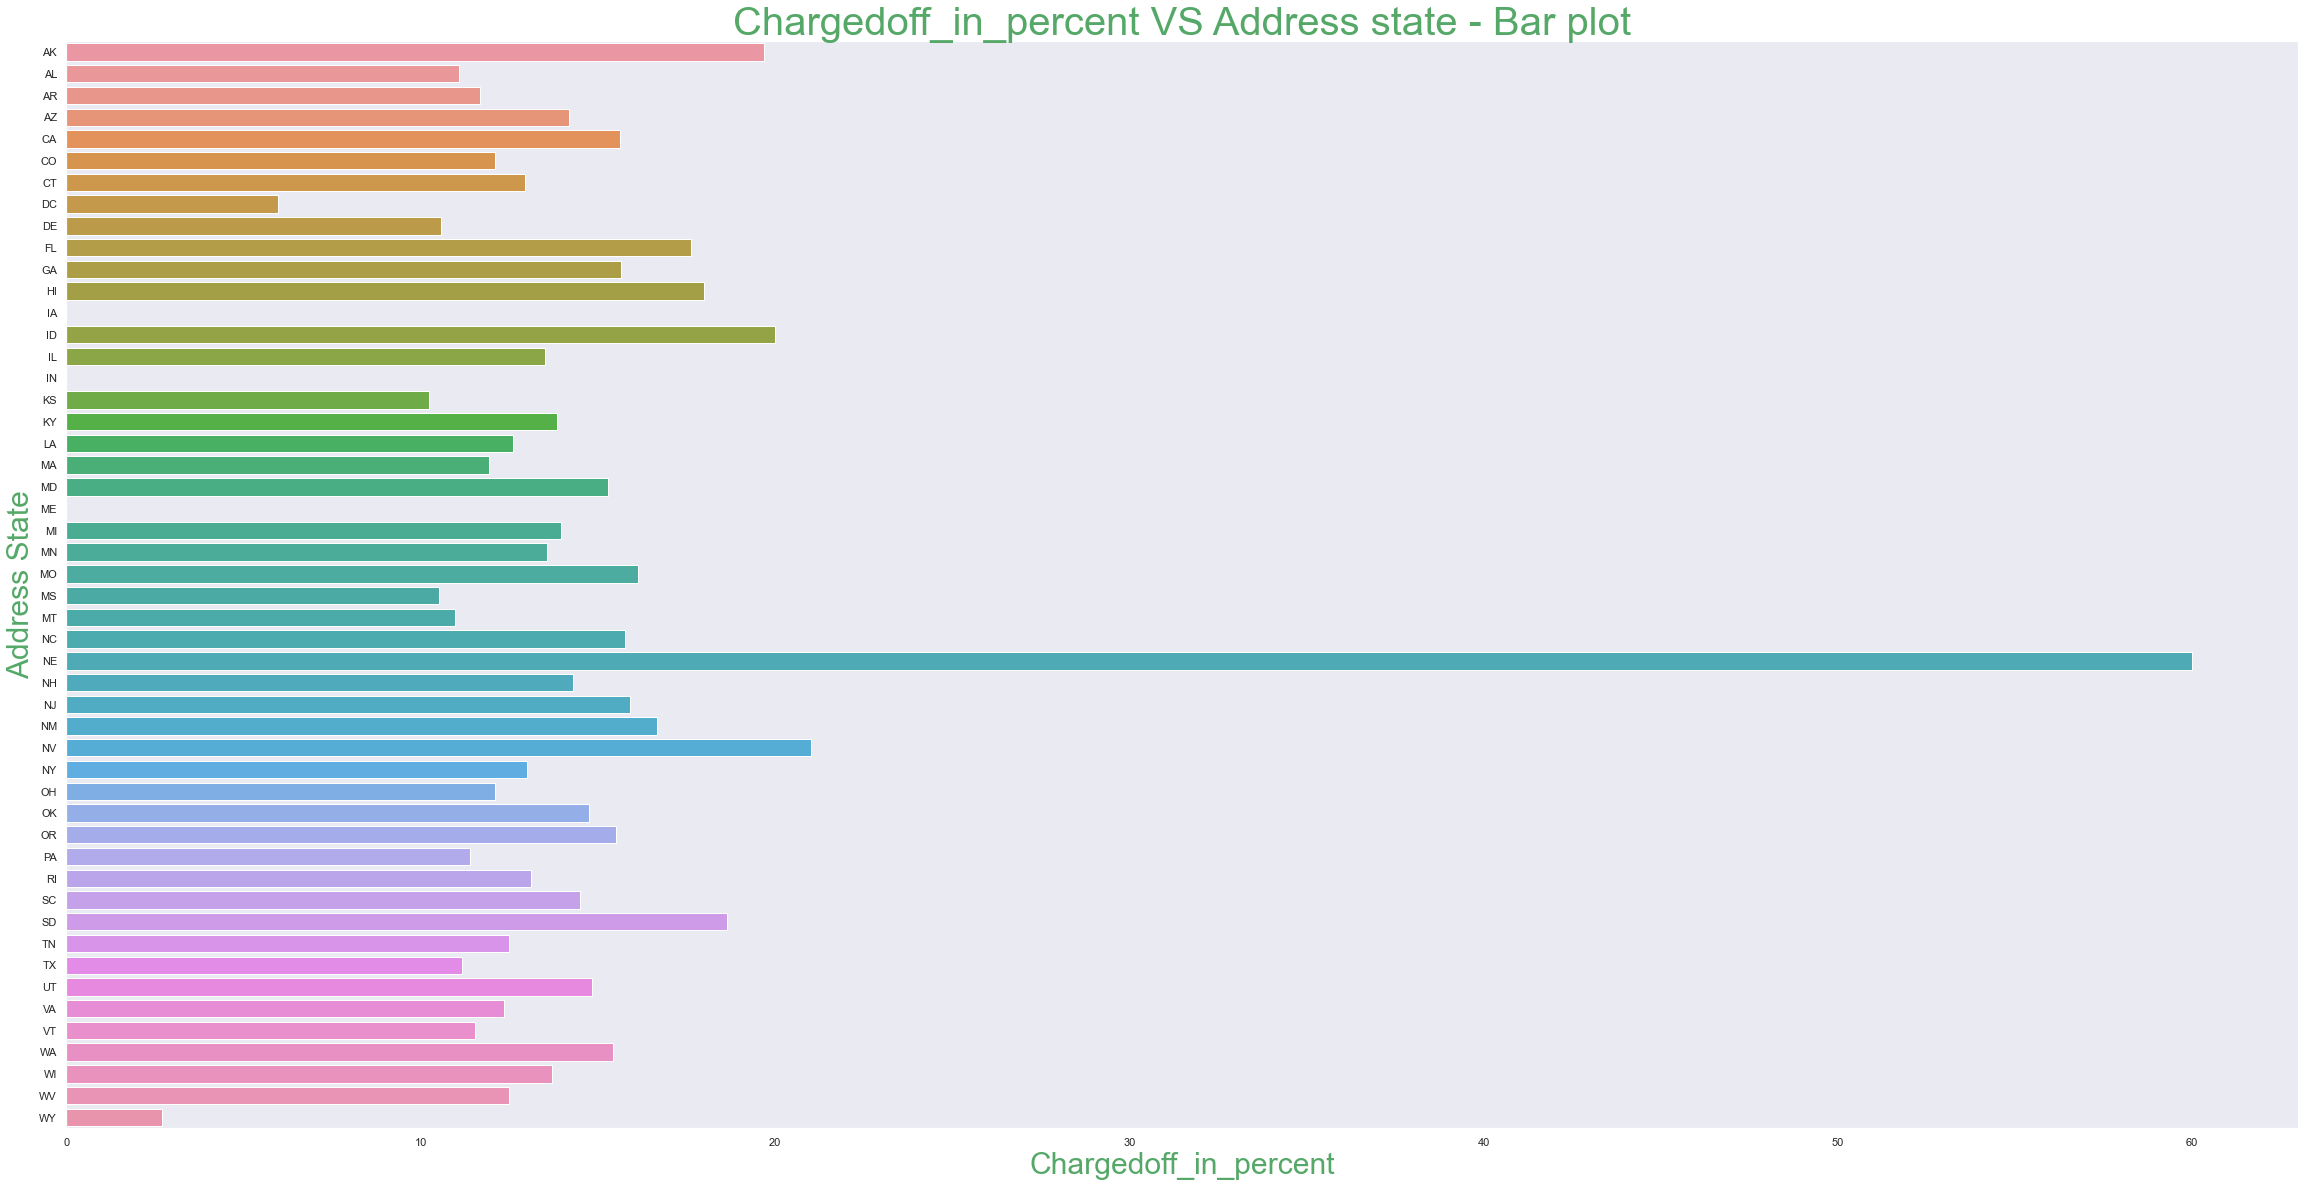

In [621]:
#Plot- address state vs loan status
plt.figure(figsize=(40,20),facecolor='w')
sns.set_style("dark")
ax=sns.barplot(data=addr_state_vs_loan_status,x='Chargedoff_in_percent_%',y='addr_state')
ax.set_title("Chargedoff_in_percent VS Address state - Bar plot",fontsize=40,color='g')
ax.set_xlabel("Chargedoff_in_percent",fontsize=30,color='g')
ax.set_ylabel("Address State",fontsize=30,color='g')

plt.show()

#Charged off customer are more for NE state 80%

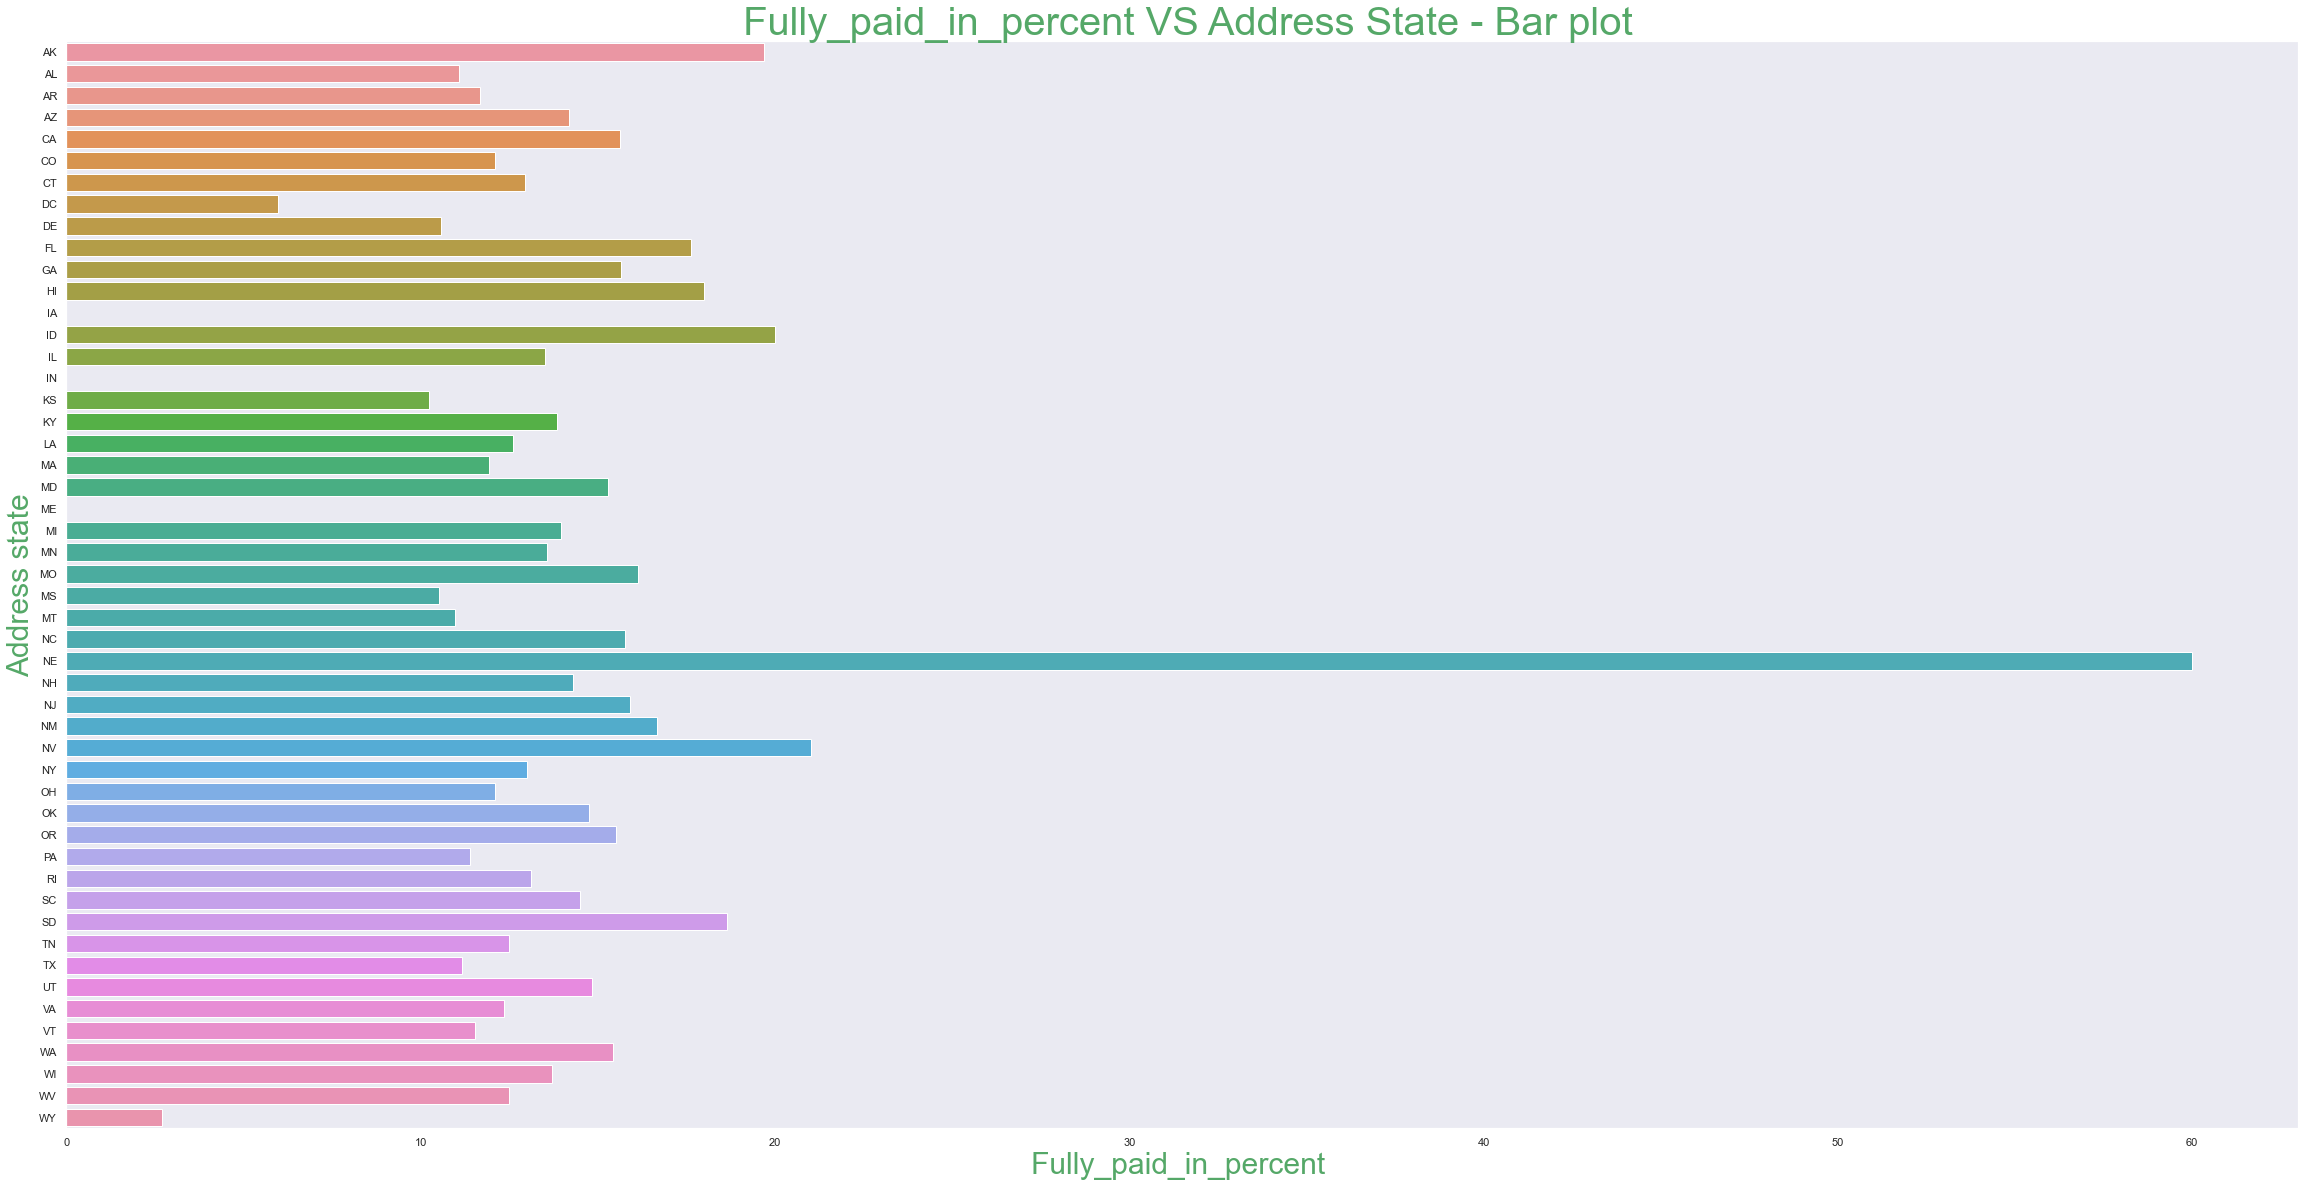

In [622]:
plt.figure(figsize=(40,20),facecolor='w')
sns.set_style("dark")
ax=sns.barplot(data=addr_state_vs_loan_status,x='Chargedoff_in_percent_%',y='addr_state')
ax.set_title(" Fully_paid_in_percent VS Address State - Bar plot",fontsize=40,color='g')
ax.set_xlabel("Fully_paid_in_percent ",fontsize=30,color='g')
ax.set_ylabel("Address state",fontsize=30,color='g' )
plt.show()


In [623]:
df.shape

(34432, 43)

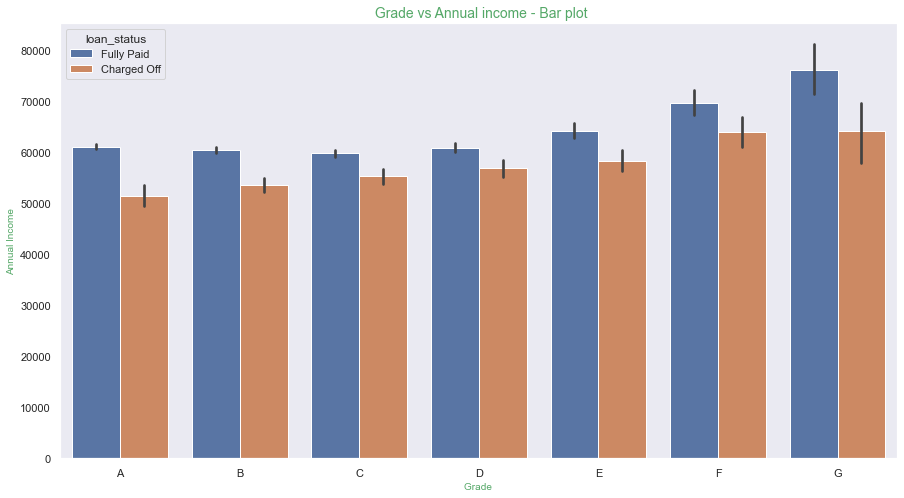

In [624]:
#Variation of annual income across grade for loan status
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")
ax=sns.barplot(data=df,x='grade',y='annual_inc',hue="loan_status",estimator=np.mean,order='ABCDEFG')
ax.set_title(" Grade vs Annual income - Bar plot",fontsize=14,color='g')
ax.set_xlabel("Grade ",fontsize=10,color='g')
ax.set_ylabel("Annual Income",fontsize=10,color='g' )
plt.show()

#Charged off LC has lower annual income compared to fully paid paid customers.

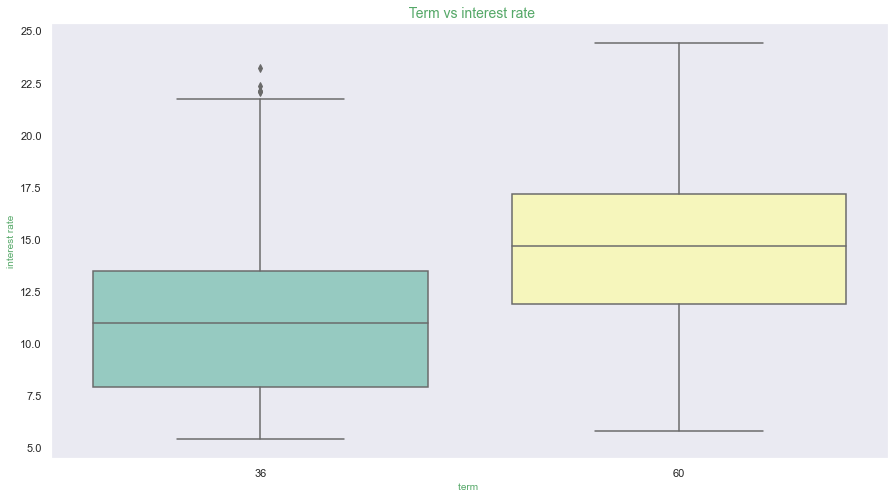

In [625]:
#term vs interest rate
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")
ax = sns.boxplot(y='int_rate', x='term', data =df,palette='Set3')
ax.set_title(" Term vs interest rate",fontsize=14,color='g')
ax.set_xlabel("term ",fontsize=10,color='g')
ax.set_ylabel("interest rate",fontsize=10,color='g' )
plt.show()

#interst rate are higher for longer term

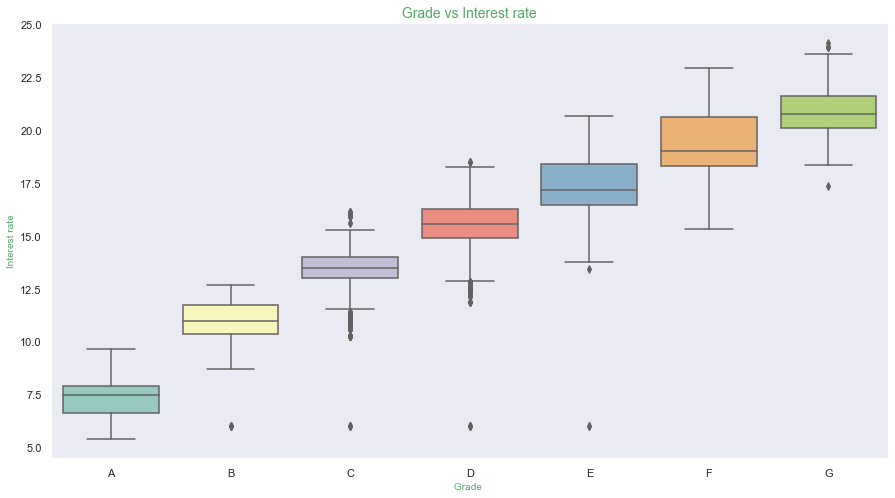

In [496]:
#Grade vs Interest rate
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")
ax = sns.boxplot(y='int_rate', x='grade', data =df,palette='Set3',order='ABCDEFG')
ax.set_title(" Grade vs Interest rate ",fontsize=14,color='g')
ax.set_xlabel("Grade ",fontsize=10,color='g')
ax.set_ylabel("Interest rate",fontsize=10,color='g' )
plt.show()

#Lower the grade,higher the interest rate

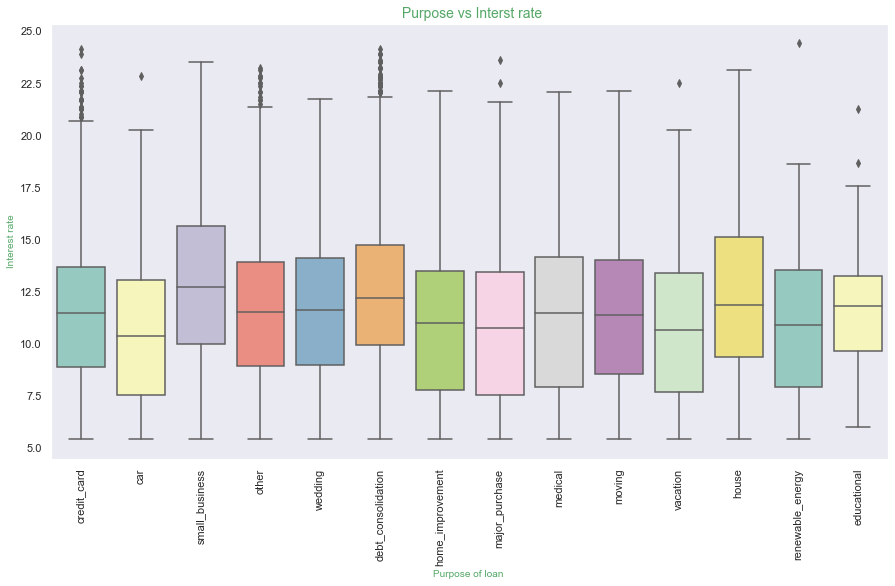

In [626]:
#Purpose of loan vs interest rate
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")
ax = sns.boxplot(y='int_rate', x='purpose', data =df,palette='Set3')
ax.set_title(" Purpose vs Interst rate",fontsize=14,color='g')
ax.set_xlabel("Purpose of loan ",fontsize=10,color='g')
ax.set_ylabel("Interest rate",fontsize=10,color='g' )
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

#For small business interest rates are high

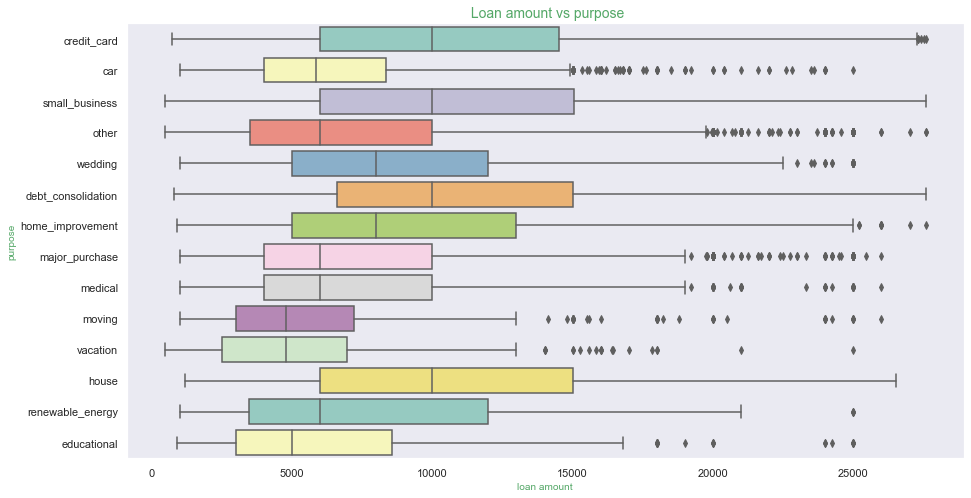

In [627]:
#Loan amount vs purpose
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")
ax = sns.boxplot(y='purpose', x='loan_amnt', data =df,palette='Set3')
ax.set_title(" Loan amount vs purpose",fontsize=14,color='g')
ax.set_xlabel("loan amount ",fontsize=10,color='g')
ax.set_ylabel("purpose",fontsize=10,color='g' )
plt.show()

# loan amount for small business are higher compared to other

In [628]:
#multivariate analysis

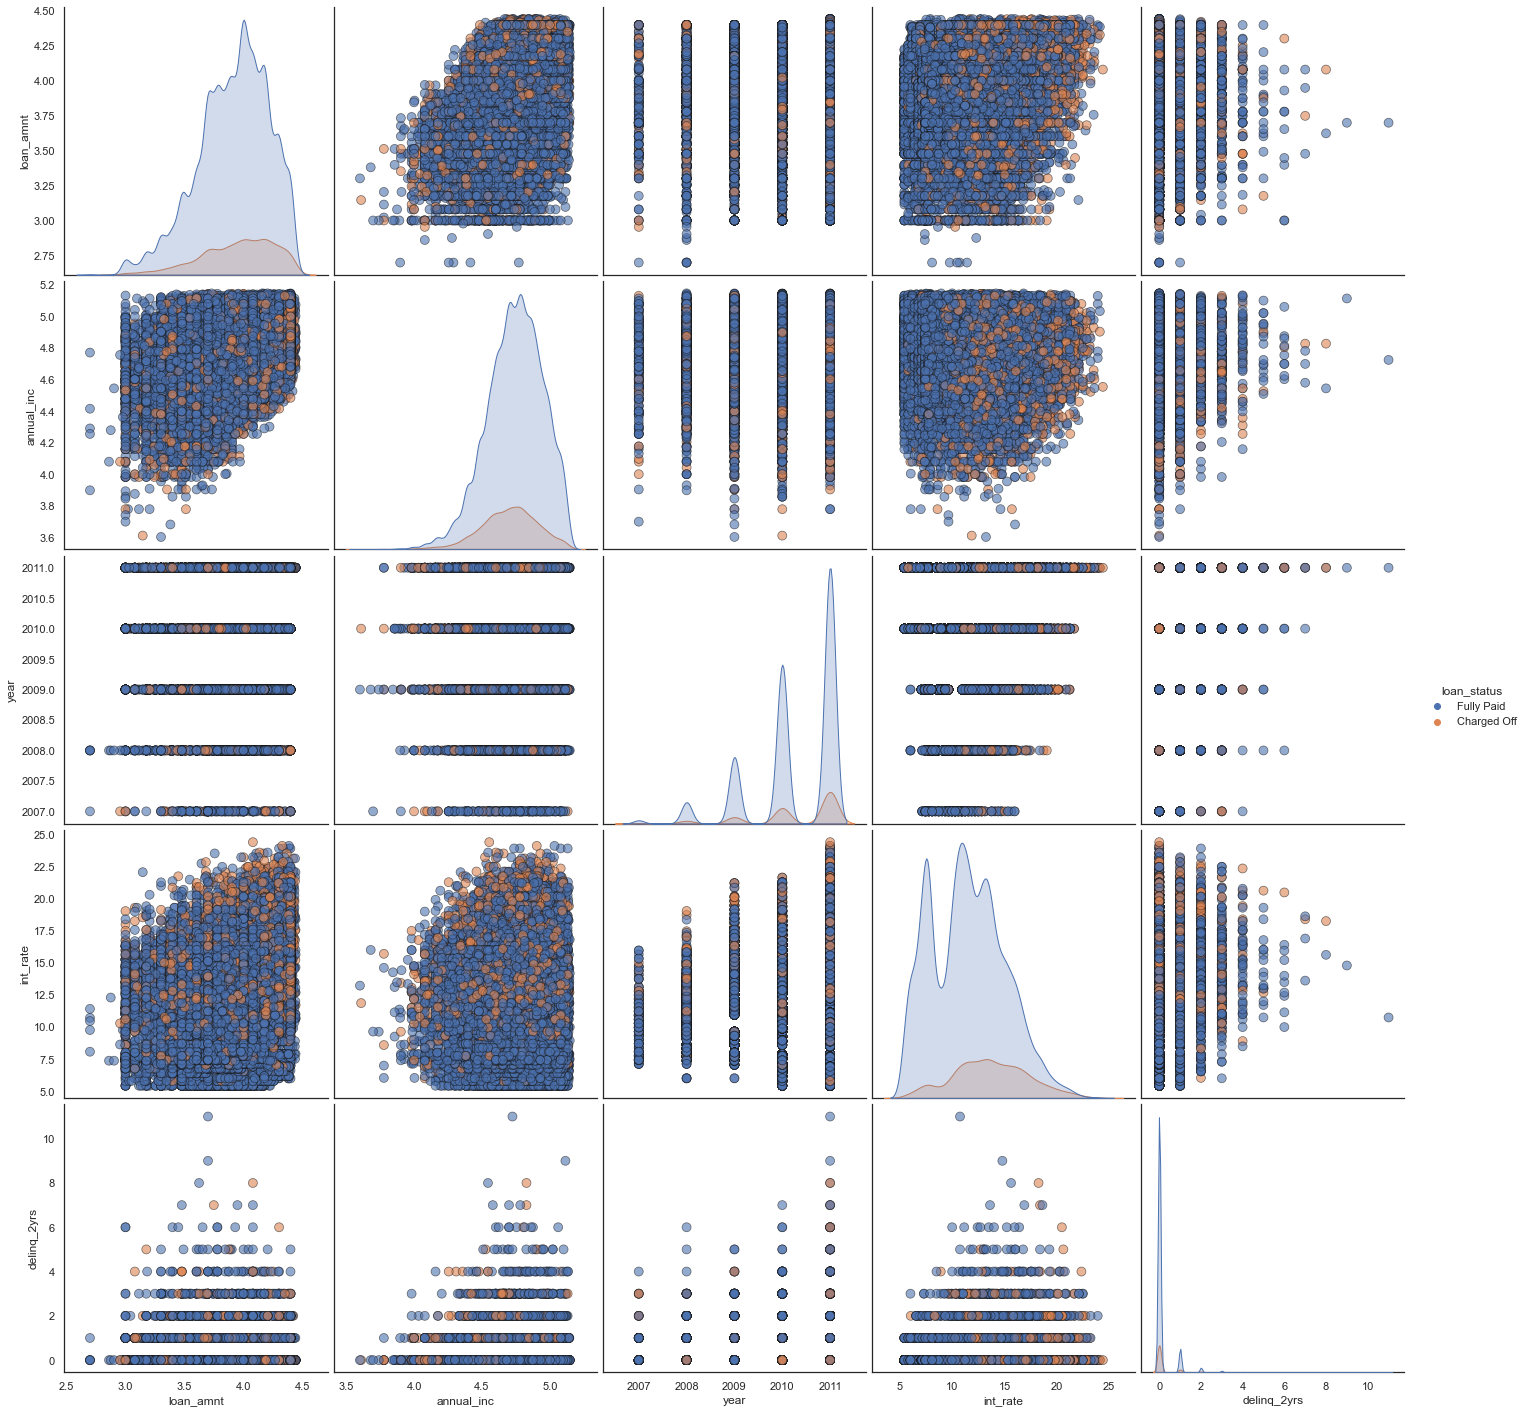

In [649]:
df1 = df[['loan_amnt', 'annual_inc', 'year','int_rate','loan_status','delinq_2yrs']].copy()

#Reducing the variation or range for below fields
df1.loan_amnt=np.log10(df1.loan_amnt)
df1.annual_inc=np.log10(df1.annual_inc)
df1.head()
#plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("white")
sns.pairplot(df1, hue = 'loan_status',diag_kind = 'kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 4)
plt.show()


# Higher the interest rate higher charged off customer
# Higher the annual income higher the loan amount .
# intrest rate is increasing with loan amount increase.

loan_amnt  annual_inc      year  int_rate  delinq_2yrs
loan_amnt     1.000000    0.361691  0.052324  0.246998    -0.039843
annual_inc    0.361691    1.000000  0.022036  0.020204     0.031579
year          0.052324    0.022036  1.000000  0.018983    -0.000789
int_rate      0.246998    0.020204  0.018983  1.000000     0.157208
delinq_2yrs  -0.039843    0.031579 -0.000789  0.157208     1.000000

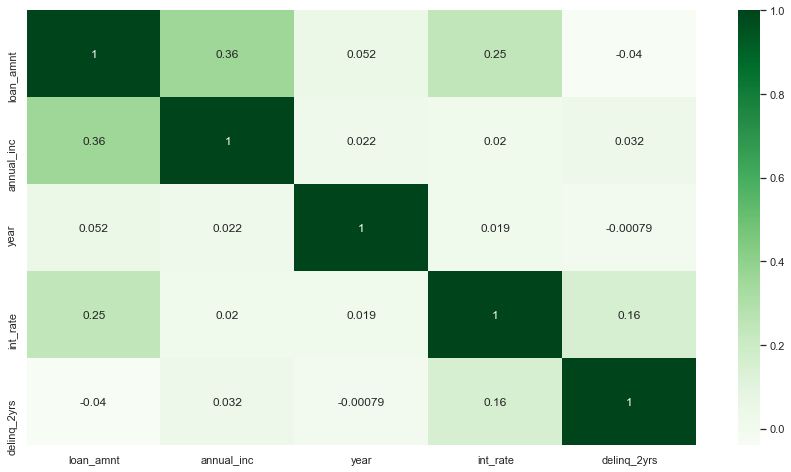

In [648]:
#Checking correclation between loan amount,annual income,year, interest rate
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")
df2=df[['loan_amnt', 'annual_inc', 'year','int_rate','delinq_2yrs']].copy()
#df2.loan_amnt=np.log10(df2.loan_amnt)
#df2.annual_inc=np.log10(df2.annual_inc)
dataplot = sns.heatmap(df2.corr(), cmap="Greens", annot=True)
df2.corr()
#Postive correlation between 